In [1]:
%load_ext autoreload
%autoreload 2
import torch
from dataset import get_dataloader, show_images
from model import FlowMatchingModel
from train import FlowMatchingModule
import lightning as L
from solvers import ODESampler
import matplotlib.pyplot as plt
import pandas as pd
from probability_paths import LinearPath, GaussianPath

In [2]:
dataloader, class_dict, reverse_dict = get_dataloader(image_folder="flowers/", image_size=128)

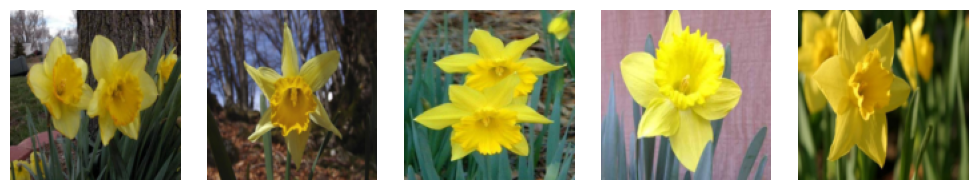

In [3]:
show_images(next(iter(dataloader))[:5])

In [4]:
flow = FlowMatchingModel(channels=32, num_blocks=5)
prob_path = GaussianPath()

In [6]:
trainer = L.Trainer(max_epochs=1000)
module = FlowMatchingModule.load_from_checkpoint(model=flow, checkpoint_path="lightning_logs/version_5/checkpoints/epoch=99-step=4300.ckpt", prob_path=prob_path)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [7]:
trainer.fit(module, train_dataloaders=dataloader)

You are using a CUDA device ('NVIDIA A100-PCIE-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type              | Params | Mode 
----------------------------------------------------
0 | model | FlowMatchingModel | 124 M  | train
----------------------------------------------------
124 M     Trainable params
0         Non-trainable params
124 M     Total params
496.312   Total estimated model params size (MB)
299       Modules in train mode
0         Modules in eval mode
/lustre/home/lmucko/.venv/lib64/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (43) is smaller than the logging interval Trainer(log_every_n_steps=50). S

Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [13]:
x0 = torch.randn(10,3,64,64).to("cuda")
module.to("cuda")
sampler = ODESampler()

In [14]:
samples = sampler.sample(module, x0, timesteps=20, method="midpoint", return_path=False)

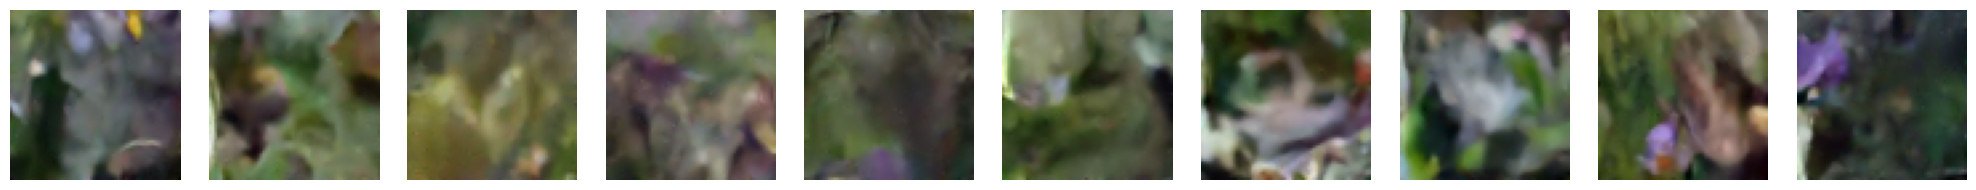

In [15]:
show_images(samples.cpu())